# Milestones Jupyter Notebook 
### milestones 4 & 5 (pandas & matplotlib)

## Milestone 4 - PANDAS
### Learning objectives
- How to read data from a CSV (comma-separated value) file to create a DataFrame.
- How to filter data in a DataFrame.
- How to compute summary statistics for a DataFrame.
- How to use the groupby method to aggregate data.
- How to dump results of analysis to a CSV file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
VESPdf = pd.DataFrame(pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv"))
VESPdf.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

### 1) How many different companies are represented in the data set?

In [3]:
ncomp = len(VESPdf['Company Name'].unique())
print("There are %d companies represented in the data set." %ncomp)

There are 439 companies represented in the data set.


### 2) What is the total number of jobs created for businesses in Queens?

In [4]:
VESPdf.groupby('Borough')['Job created'].sum()
qJobs = VESPdf.groupby('Borough')['Job created'].sum()[3]
print("There are %d total jobs created in Queens." %qJobs)

There are 102 total jobs created in Queens.


### 3) How many different unique email domains names are there in the data set?

In [5]:
len(np.unique([str(domain).split('@')[1] for domain in VESPdf['company email'] if '@' in str(domain)]))

356

In [6]:
ndomains = len(np.unique([str(domain).split('@')[1] for domain in VESPdf['company email'] if '@' in str(domain)]))
print("There are %d unique email domains in the data set." %ndomains)

print("For example:")
print([str(domain).split('@')[1] for domain in VESPdf['company email'] if '@' in str(domain)][:10])

There are 356 unique email domains in the data set.
For example:
['energyspec.com', 'industrycity.com', 'silvprop.com', 'silvprop.com', 'dial7.com', 'gmail.com', 'atjelectrical.com', 'KLCNY.com', 'am.jll.com', '21st centuryoptics.com']


### 4) Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [7]:
MeanCounts = VESPdf.groupby('NTA')['Job created'].agg(['sum','mean'])
MeanCounts['MeanSaved'] = VESPdf.groupby('NTA')['Total Savings'].agg('mean')
MeanCounts['JobTot'] = VESPdf.groupby('NTA')['Job created'].agg('sum')
MeanCounts['Count'] = VESPdf.groupby('NTA')['NTA'].agg('count')
MeanCounts = MeanCounts[MeanCounts['Count']>4]
# could just rename columns
# could save MeanCounts instead of creating new DF

In [8]:
MeanCounts = MeanCounts.drop(columns=['sum','mean'])
# MC5 = MeanCounts.rename(columns={'MeanSaved':'Average Savings'})
# MC5 = MeanCounts.rename(columns={'JobTot':'Total Jobs Created'})
# MC5 = MeanCounts.rename(columns={'Count':'Number of Listed Businesses'})

In [9]:
MC5 = MeanCounts.rename(columns={'MeanSaved':'Average Savings', 'JobTot':'Total Jobs Created', 'Count':'Number of Listed Businesses'})
MC5['Average Savings'] = np.round(MC5['Average Savings'],decimals=2)

### The average Savings and Total Jobs Created for each NTA with at least 5 businesses shown below

In [10]:
MC5

,Average Savings,Total Jobs Created,Number of Listed Businesses
NTA,,,
Battery Park City-Lower Manhattan,469890.80,0.0,9
Bushwick South,26140.46,10.0,10
Carroll Gardens-Columbia Street-Red Hook,24337.39,0.0,11
College Point,17159.37,2.0,7
Crown Heights North,4036.30,0.0,9
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.34,0.0,10
East New York,48433.09,15.0,9
East Williamsburg,13990.63,0.0,11
Greenpoint,9753.65,0.0,14


In [11]:
MC5.to_csv('JobCreationSavingResults.csv')

## Milestone 5 - MATPLOTLIB
### Learning objectives

## 1) Scatter plot of jobs created versus average savings 
    - both a standard and a logarithmic scale

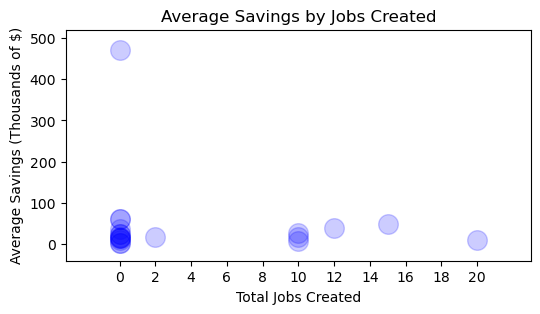

In [29]:
fig = plt.figure(figsize=(6, 3))
ax=fig.add_subplot(111)
ax.scatter(MC5['Total Jobs Created'],MC5['Average Savings']/1000, 200, color = 'blue', alpha = 0.2)
plt.title('Average Savings by Jobs Created')
ax.set(ylabel = 'Average Savings (Thousands of $)',
      xlabel = 'Total Jobs Created', xlim=[-2, 22], ylim = [-40, 520])
ax.set(xticks=np.arange(0,21,2), xticklabels=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.show()

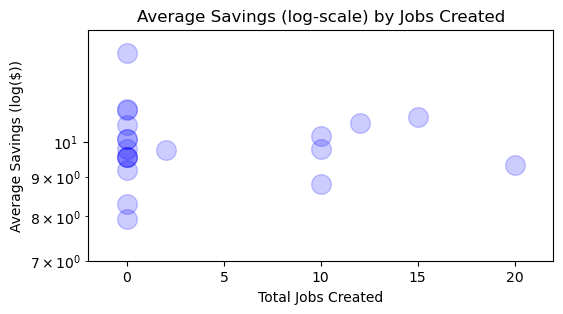

In [51]:
fig = plt.figure(figsize=(6, 3))
ax=fig.add_subplot(111)
ax.scatter(MC5['Total Jobs Created'],np.log(MC5['Average Savings']), 200, color = 'blue', alpha=.2)
#ax.scatter(MC5['Total Jobs Created'],np.log(MC5['Average Savings']), color = 'blue', alpha=.2)
plt.title('Average Savings (log-scale) by Jobs Created')
ax.set(ylabel = 'Average Savings (log($))',
      xlabel = 'Total Jobs Created',xlim=[-2, 22], ylim = [7,14])
ax.set(yscale='log')
plt.show()


## 2) Histogram of log of the average total savings 

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Average Total Savings (log scale)'),
 Text(0.5, 1.0, 'Histogram of log Average Savings')]

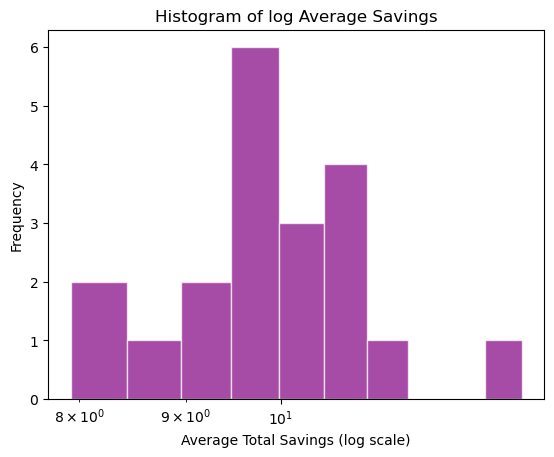

In [54]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(np.log(MC5['Average Savings']), color = 'purple', alpha = 0.7, edgecolor = "white")
ax.set(xscale='log')
ax.set(ylabel="Frequency", xlabel="Average Total Savings (log scale)", title="Histogram of log Average Savings")

## 3) Line plot of the total jobs created for each month

In [66]:
MeanCounts = VESPdf.groupby('NTA')['Job created'].agg(['sum','mean'])
MeanCounts['MeanSaved'] = VESPdf.groupby('NTA')['Total Savings'].agg('mean')
MeanCounts['JobTot'] = VESPdf.groupby('NTA')['Job created'].agg('sum')
MeanCounts['Count'] = VESPdf.groupby('NTA')['NTA'].agg('count')
MeanCounts = MeanCounts[MeanCounts['Count']>4]


In [67]:
VESPdf['months'] = [date[0:2] for date in VESPdf['Effective Date']]

In [68]:
JobMonth = VESPdf.groupby('months')['months'].agg(['count','sum'])#.value_count()
JobMonth['Jobs'] = VESPdf.groupby('months')['Job created'].agg('sum')                           

In [69]:
JobMonth['Mon']=(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

[Text(0.5, 1.0, 'Jobs Created by Month'),
 Text(0, 0.5, 'Number of Jobs Created'),
 Text(0.5, 0, 'Month')]

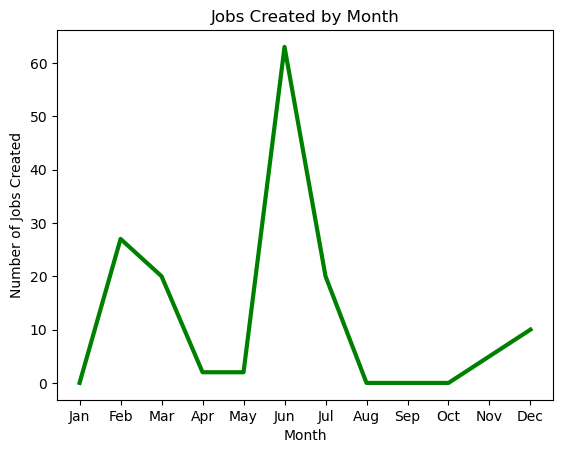

In [70]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(JobMonth['Mon'],JobMonth['Jobs'],color = 'green',linewidth=3)
ax.set(title='Jobs Created by Month', ylabel='Number of Jobs Created', xlabel='Month')
       #xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])